In [253]:
# Import Various Libraries, including Tweepy, a Python library for the Twitter API,
# and TextBlob, a library with a sentiment analysis method.
import os
import requests
import pandas as pd
import hvplot.pandas
from dotenv import load_dotenv
from textblob import TextBlob 
import tweepy
#import twitter_reader.py
load_dotenv()
##########Micheal imports
import panel as pn
pn.extension('plotly')
from panel.interact import interact
from panel import widgets
import plotly.express as px
import hvplot.pandas
import matplotlib.pyplot as plt
from pathlib import Path
import requests
import json
import numpy as np
%matplotlib inline
from datetime import date
from datetime import timedelta
pd.options.display.float_format = '{:.2f}'.format

ModuleNotFoundError: No module named 'textblob'

In [254]:
#Pass API Keys to Twitter API and build Tweepy API handler object.
consumer_key = os.getenv('TWITTER_API_KEY')
consumer_secret = os.getenv('TWITTER_SECRET_KEY')
auth = tweepy.AppAuthHandler(consumer_key, consumer_secret)
api = tweepy.API(auth)

NameError: name 'tweepy' is not defined

# Question 1: Correlation across Cryptocurrenices
    

In [255]:
#Read in crypto data
crypto_df = pd.read_csv('../data/raw_data/correlation_df.csv', index_col='date', infer_datetime_format=False, parse_dates=True)
crypto_df = crypto_df.dropna()

In [256]:
crypto_corr = crypto_df.pct_change()
crypto_corr

,BTC_close,ETH_close,LTC_close
date,,,
2016-08-17,NaN,NaN,NaN
2016-08-18,-0.000627,-0.004621,0.022099
2016-08-19,-0.000732,0.000000,0.081081
2016-08-21,0.013283,0.040854,0.000000
2016-08-22,0.006726,-0.009813,-0.002500
2016-08-23,-0.004802,-0.009009,-0.010025
2016-08-24,-0.006731,0.000909,-0.040506
2016-08-25,-0.004996,0.029973,0.005277
2016-08-26,0.006446,-0.005291,0.000000


In [257]:
rollingcorr_df = crypto_corr['BTC_close'].rolling(20).corr(crypto_corr['ETH_close'])

In [258]:
btceth_corr = rollingcorr_df.hvplot(
    kind='line', 
    title='Correlation by Year BTC and ETH', 
    height=500, 
    width=1000).opts(yformatter="%.2f")
btceth_corr

:Curve   [date]   (0)

In [259]:
#crypto_corr.hvplot(kind='line', title='Crypto Price Plot by Year/Month', groupby=['date.year'])

crypto_price = crypto_corr.hvplot(
    kind='line', 
    title='Crypto Price Plot by Year/Month', 
    groupby=['date.year','date.month'],
    height=500, 
    width=800).opts(yformatter="%.2f")
crypto_price

:DynamicMap   [date.year,date.month]
   :NdOverlay   [Variable]
      :Curve   [date]   (value)

C:\Users\Zarbin\anaconda3\envs\pyvizenv\lib\site-packages\pandas\plotting\_tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\Zarbin\anaconda3\envs\pyvizenv\lib\site-packages\pandas\plotting\_tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\Zarbin\anaconda3\envs\pyvizenv\lib\site-packages\pandas\plotting\_tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\Zarbin\anaconda3\envs\pyvizenv\lib\site-pack

array([[<AxesSubplot:xlabel='BTC_close', ylabel='BTC_close'>,
        <AxesSubplot:xlabel='ETH_close', ylabel='BTC_close'>,
        <AxesSubplot:xlabel='LTC_close', ylabel='BTC_close'>],
       [<AxesSubplot:xlabel='BTC_close', ylabel='ETH_close'>,
        <AxesSubplot:xlabel='ETH_close', ylabel='ETH_close'>,
        <AxesSubplot:xlabel='LTC_close', ylabel='ETH_close'>],
       [<AxesSubplot:xlabel='BTC_close', ylabel='LTC_close'>,
        <AxesSubplot:xlabel='ETH_close', ylabel='LTC_close'>,
        <AxesSubplot:xlabel='LTC_close', ylabel='LTC_close'>]],
      dtype=object)

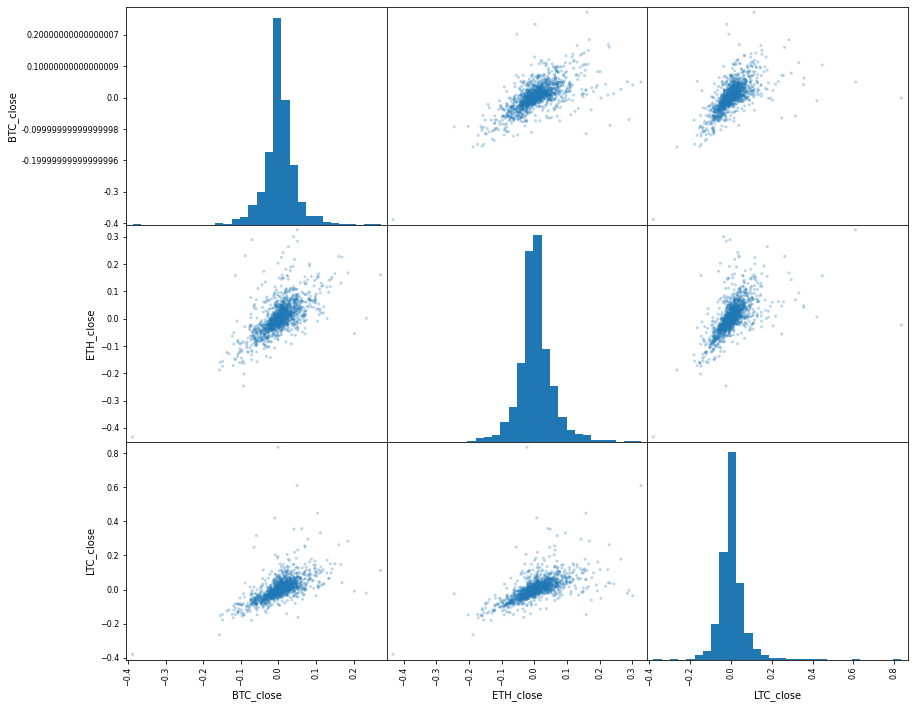

In [260]:
from pandas.plotting import scatter_matrix
corr_matrix = scatter_matrix(crypto_corr, figsize=(14,12), diagonal='hist', alpha=0.3, hist_kwds={'bins':30})
corr_matrix

# Question 2:  Twitter sentiment and Crypto Tweets

In [261]:
#Read in Tweets Data
#df_tweets = pd.read_csv('../data/raw_data/raw_tweets_01_filter_polarity.csv')
df_tweets = pd.read_csv('../data/raw_data/cleaner_tweets.csv')
df_tweets.head()

,time,twitter_user,category,text,tweet_id,tweet_source,quote_count,reply_count,retweet_count,fav_count,Polarity Rating,Popularity Rating
0,2012-08-08,joerogan,nan,RT @TG_2: @joerogan 2 million a month in drug ...,233027225165914112,Twitter Web Client,0,0,0,0,0.000000,0.000000
1,2012-08-31,VitalikButerin,bitcoin,RT @FlipPro: What is Bitcoin? #tweetforum htt...,241543098390425600,UpTweet Inc.,0,0,0,0,0.000000,0.000000
2,2012-08-31,VitalikButerin,bitcoin,@UzivajEstates Publicize it more perhaps. AFAI...,241545036863520768,Twitter Web Client,0,0,2,5,0.483333,2.416667
3,2012-08-31,VitalikButerin,bitcoin,@UzivajEstates Publicize it more perhaps. AFAI...,241545670681575425,UpTweet Inc.,0,1,1,1,0.483333,0.483333
4,2013-01-01,VitalikButerin,bitcoin,"@FlipPRO What does ""regulating"" bitcoin even m...",286080819506843648,UpTweet Inc.,0,0,2,2,0.093750,0.187500


In [262]:
#Slicing the DataFrame of tweets by keyword category.
#df_tweets.reset_index(inplace=True)
df_tweets['time']= pd.to_datetime(df_tweets['time'],format= '%b:%d:%Y',infer_datetime_format=True ).dt.date
df_tweets = df_tweets.set_index('time')
df_bitcoin_tweets = df_tweets.loc[df_tweets.category.str.contains('bitcoin')]
df_ethereum_tweets = df_tweets.loc[df_tweets.category.str.contains('ethereum')]
df_litecoin_tweets = df_tweets.loc[df_tweets.category.str.contains('litecoin')]
df_generic_tweets = df_tweets.loc[df_tweets.category.str.contains('generic')]
df_tweets.head()

,twitter_user,category,text,tweet_id,tweet_source,quote_count,reply_count,retweet_count,fav_count,Polarity Rating,Popularity Rating
time,,,,,,,,,,,
2012-08-08,joerogan,nan,RT @TG_2: @joerogan 2 million a month in drug ...,233027225165914112,Twitter Web Client,0,0,0,0,0.000000,0.000000
2012-08-31,VitalikButerin,bitcoin,RT @FlipPro: What is Bitcoin? #tweetforum htt...,241543098390425600,UpTweet Inc.,0,0,0,0,0.000000,0.000000
2012-08-31,VitalikButerin,bitcoin,@UzivajEstates Publicize it more perhaps. AFAI...,241545036863520768,Twitter Web Client,0,0,2,5,0.483333,2.416667
2012-08-31,VitalikButerin,bitcoin,@UzivajEstates Publicize it more perhaps. AFAI...,241545670681575425,UpTweet Inc.,0,1,1,1,0.483333,0.483333
2013-01-01,VitalikButerin,bitcoin,"@FlipPRO What does ""regulating"" bitcoin even m...",286080819506843648,UpTweet Inc.,0,0,2,2,0.093750,0.187500


In [263]:
#Calculating Rolling Sentiment Polarity average for each tweet category.
df_bitcoin_tweets_rolling = df_bitcoin_tweets['Polarity Rating'].rolling(window=50).mean()
df_ethereum_tweets_rolling = df_ethereum_tweets['Polarity Rating'].rolling(window=50).mean()
df_litecoin_tweets_rolling = df_litecoin_tweets['Polarity Rating'].rolling(window=50).mean()
df_generic_tweets_rolling = df_generic_tweets['Polarity Rating'].rolling(window=50).mean()
df_bitcoin_tweets_rolling

time
2012-08-31         NaN
2012-08-31         NaN
2012-08-31         NaN
2013-01-01         NaN
2013-01-23         NaN
2013-02-07         NaN
2013-02-08         NaN
2013-02-08         NaN
2013-03-29         NaN
2013-03-29         NaN
2013-04-11         NaN
2013-05-04         NaN
2013-05-18         NaN
2013-05-18         NaN
2013-08-13         NaN
2013-09-14         NaN
2013-10-23         NaN
2013-10-27         NaN
2013-11-22         NaN
2013-12-22         NaN
2014-01-16         NaN
2014-01-16         NaN
2014-01-27         NaN
2014-01-27         NaN
2014-01-28         NaN
2014-01-28         NaN
2014-01-28         NaN
2014-01-28         NaN
2014-01-28         NaN
2014-01-29         NaN
                ...   
2020-10-22    0.030403
2020-10-22    0.039403
2020-10-26    0.047403
2020-10-26    0.049069
2020-11-06    0.049236
2020-11-11    0.053236
2020-11-16    0.051236
2020-11-16    0.044569
2020-11-18    0.044569
2020-11-18    0.040569
2020-11-25    0.044653
2020-11-25    0.053653
2020-1

In [280]:
from bokeh.models.formatters import DatetimeTickFormatter

formatter = DatetimeTickFormatter(months='%b %Y')
bitcoin_roller_graph = df_bitcoin_tweets_rolling.hvplot(x='time',y=['Polarity Rating'],xticks=12,color='red',width=1000, height=500,xformatter=formatter)
ethereum_roller_graph = df_ethereum_tweets_rolling.hvplot(x='time',y=['Polarity Rating'],xticks=12,color='blue',width=1000, height=500,)
generic_roller_graph = df_generic_tweets_rolling.hvplot(x='time',y=['Polarity Rating'],xticks=12,color='black',width=1000, height=500,)
litecoin_roller_graph = df_litecoin_tweets_rolling.hvplot(x='time',y=['Polarity Rating'],xticks=12,color='yellow',legend='top_left',width=1000, height=500,)
tweets_graph = df_bitcoin_tweets.hvplot(width=1000, height=500,x='time', y='Polarity Rating',rot=90,xticks=12,hover_cols = ['twitter_user','text'],
                                        kind='scatter',aggregator='mean',color='twitter_user',xformatter=formatter, title = 'Historic Bitcoin Tweets with Rolling Sentiment')

rolling_tweet_sentiment = tweets_graph*bitcoin_roller_graph
rolling_tweet_sentiment

:Overlay
   .Scatter.I             :Scatter   [time]   (Polarity Rating,twitter_user,text)
   .Curve.Polarity_Rating :Curve   [time]   (Polarity Rating)

In [281]:
pol_rating = bitcoin_roller_graph * ethereum_roller_graph * generic_roller_graph * litecoin_roller_graph
pol_rating

:Overlay
   .Curve.Polarity_Rating.I   :Curve   [time]   (Polarity Rating)
   .Curve.Polarity_Rating.II  :Curve   [time]   (Polarity Rating)
   .Curve.Polarity_Rating.III :Curve   [time]   (Polarity Rating)
   .Curve.Polarity_Rating.IV  :Curve   [time]   (Polarity Rating)

In [266]:
def tweet_search_free(string_query, number_tweets = 100):
    for tweets in tweepy.Cursor(api.search, q=string_query).items(number_tweets):
        screen_name = tweets.user.screen_name
        contents = ""
        #if tweets.truncated == True:
        #    contents = tweets.full_text
        #else:
        contents = tweets.text
        polarity = sentiment_reader(contents)
        
        category = category_key(contents,dict_search_terms)
        yield [screen_name, category, str(tweets.created_at), str(tweets.coordinates), contents, tweets.id, tweets.source,"x",
               "x", tweets.retweet_count, tweets.favorite_count, polarity, (polarity * int(tweets.retweet_count))]

In [267]:
#Function for generating a list of categories from the presence of keywords in text.
def category_key(text_block,dict_keywords):
    category_list = []
    output = " "
    contents = text_block.lower()
    for key in dict_keywords:
        for keyword in dict_keywords[key]:
            if keyword in contents:
                category_list.append(key)
    #return output.join(category_list)
    return category_list

In [268]:
#Function for generating sentiment values using textblob library.
def sentiment_reader(text_block):
    sentiment_text = TextBlob(text_block)
    return sentiment_text.polarity

In [269]:
#Function for fixing duplicate values in the category column.
def no_dupes(string):
    string =  str(string)
    if string[-1] != " ":
        string = string + " "
    wordlist = []
    output = ""
    word = ""
    for letter in string:
        if letter != " ":
            word = word + letter
        elif word not in wordlist:
            wordlist.append(word)
            output = output + word + " "
            word = ""
        else:
            word = ""
    return output

In [270]:
#Function for creating search query string for tweepy.Cursor(api.search). Max query length is 128 for sandbox env.
#In it's current form it supports a bunch of keywords joined by OR, grouped by (), AND from a single tweeter.
def query_creator(list_keywords, twitter_user = "!", mood = "!"):
    query = "("
    for keyword in (list_keywords):
        query += keyword
        if keyword != list_keywords[-1]:
            query += " OR "
        else:
            query += ")"
    if twitter_user != "!":
        query += " from:" + twitter_user
    return query

In [271]:
#Function for appending search results to the tweet df.
def tweet_dataframe_append(rows, target_dataframe):
    for row in rows:
        series_result = pd.Series(row, index=target_dataframe.columns)
        target_dataframe = target_dataframe.append(series_result, ignore_index=True)
        return target_dataframe

In [272]:
#Using recent search to generate recent tweets from anyone that include our keywords.
#Define Search Term Library
dict_search_terms = {'bitcoin':['bitcoin','btc','#bitcoin',],
                     'generic':['cryptocurrency','blockchain'],
                     'litecoin':['litecoin','ltc','#litecoin', '#ltc'],
                     'ethereum':['ethereum','eth','#ethereum','#eth']   }
dict_tweet_structure = {"twitter_user":"","category":[],"time":"","sentiment":"","text":"","tweet_id":"",
                        "tweet_source":"","quote_count":0,"reply_count":0,"retweet_count":0,"fav_count":0,
                        "Polarity Rating": "", "Popularity Rating":""}
df_tweets_live = pd.DataFrame(dict_tweet_structure)
query = query_creator(dict_search_terms['generic']+dict_search_terms['bitcoin']+dict_search_terms['litecoin']+dict_search_terms['ethereum'])
print(query)
live_results = tweet_search_free(query, 1000)
for tweets in live_results:
    df_tweets_live = tweet_dataframe_append(live_results, df_tweets_live)
    

(cryptocurrency OR blockchain OR bitcoin OR btc OR #bitcoin OR litecoin OR ltc OR #litecoin OR #ltc OR ethereum OR eth OR #ethereum OR #eth)


NameError: name 'tweepy' is not defined

In [286]:
polarity_test = df_tweets_live
polarity_test.head()

,twitter_user,category,time,sentiment,text,tweet_id,tweet_source,quote_count,reply_count,retweet_count,fav_count,Polarity Rating,Popularity Rating


In [287]:
polarity_test['time'] = pd.to_datetime(polarity_test['time'],format= '%M:%S',infer_datetime_format=True ).dt.time

In [288]:
rolling_poll = polarity_test['Polarity Rating'].rolling(window=20).mean()
end = pd.to_timedelta([str(polarity_test['time'].iloc[0])])
start = pd.to_timedelta([str(polarity_test['time'].iloc[-1])])
recent_tweets_duration = str((end-start)[0])
roll = rolling_poll.hvplot(x='time',y='Polarity Rating',rot=90, hover_cols = ['twitter_user','text'])
pol = polarity_test.hvplot(x='time',y='Polarity Rating',rot=90, hover_cols = ['twitter_user','text'],xticks=6,xlabel=f"Duration length = {recent_tweets_duration}")
polarity_test.mean()

IndexError: single positional indexer is out-of-bounds

In [289]:
pol

NameError: name 'pol' is not defined

# Question 3 - Influncers tweets and Crypto changer

In [273]:
from pathlib import Path
elon_data = Path('../data/clean_data/clean_elon_data.csv')
elon_data_df = pd.read_csv(elon_data, index_col='date')



In [274]:
def polarity_volume_elon():
    return elon_data_df.hvplot.bar(x='date', y=['BTC_volume_change', 'ETH_volume_change', 'LTC_volume_change'], rot=90, title='Crypto Volume Change', width=625) + elon_data_df.hvplot.bar(x='date', y='Polarity Rating', rot=90, title='Elon Musk Tweet Date and Sentiment', width=625)
polarity_volume_elon()

:Layout
   .Bars.I  :Bars   [date,Variable]   (value)
   .Bars.II :Bars   [date]   (Polarity Rating)

In [275]:
def popularity_volume_elon():
    return elon_data_df.hvplot.scatter(x='date', y='Popularity Rating', width=1250, height=500, yformatter='%.0f', title='Popularting rating of Elon tweets') * elon_data_df.hvplot.line(x='date', y='BTC_rolling_volume') * elon_data_df.hvplot.area(x='date', y='BTC_volume', stacked=False)
popularity_volume_elon()

:Overlay
   .Scatter.I :Scatter   [date]   (Popularity Rating)
   .Curve.I   :Curve   [date]   (BTC_rolling_volume)
   .Area.I    :Area   [date]   (BTC_volume)

In [276]:
def daily_change_elon():
    return elon_data_df.hvplot.scatter(y='Polarity Rating', x='date', width=1250, height=500, title='Sentiment of Elon Tweets over Time') * elon_data_df.hvplot(x='date', y='BTC_daily_change')
daily_change_elon()

:Overlay
   .Scatter.I :Scatter   [date]   (Polarity Rating)
   .Curve.I   :Curve   [date]   (BTC_daily_change)

In [277]:
def volume_change():
    return elon_data_df.hvplot.bar(y=['Polarity Rating', 'BTC_volume_change'], x='date', rot=45, width = 1250, title='Sentiment and Volume Chnage')
volume_change()

:Bars   [date,Variable]   (value)

## Panel Dashboard

In this section, you will combine all of the plots into a single dashboard view using Panel. Be creative with your dashboard design!

In [291]:
## Create panels to structure the layout of the dashboard
title_welcome = '#Crypto Dashboard'
title_musk = '#Elon Musk Seintment and Crypto Impact'
welcome_tab = pn.Column(title_welcome, title_musk, polarity_volume_elon(), " ", volume_change(), " ", popularity_volume_elon(),  " ", daily_change_elon)

#correlation tab
corr_title = '#Correlation of Cryptocurrencies BTC, ETH, LTC'
scatter_title = '#Scatter Matrix failing to show in panel, please see above'
correlation_tab = pn.Column(corr_title, btceth_corr," ", crypto_price, " ",scatter_title," ", corr_matrix)

tweet_title = '#Twitter Sentiment'
Twitter_tab = pn.Column(tweet_title, rolling_tweet_sentiment, " ", pol_rating, " ")

# Create tabs|
panel = pn.Tabs(("Tweets & Impact", welcome_tab),
("Correlation", correlation_tab),
("Twitter Analysis", Twitter_tab))

# Serve the Panel Dashboard

In [292]:
panel.servable()

Tabs
    [0] Column
        [0] Markdown(str)
        [1] Markdown(str)
        [2] HoloViews(Layout)
        [3] Markdown(str)
        [4] HoloViews(Bars)
        [5] Markdown(str)
        [6] HoloViews(Overlay)
        [7] Markdown(str)
        [8] Column
            [0] Column()
            [1] Row
                [0] HoloViews(Overlay, name='interactive203232')
    [1] Column
        [0] Markdown(str)
        [1] HoloViews(Curve)
        [2] Markdown(str)
        [3] Row
            [0] HoloViews(DynamicMap)
            [1] Column
                [0] WidgetBox
                    [0] DiscreteSlider(margin=(20, 20, 5, 20), name='date.year', options=OrderedDict([('2016', ...]), value=2016, value_throttled=2016, width=250)
                    [1] DiscreteSlider(margin=(5, 20, 20, 20), name='date.month', options=OrderedDict([('1', ...]), value=1, value_throttled=1, width=250)
                [1] VSpacer()
        [4] Markdown(str)
        [5] Markdown(str)
        [6] Markdown(str)
        [7] Str(ndarray)
    [2] Column
        [0] Markdown(str)
        [1] HoloViews(Overlay)
        [2] Markdown(str)
        [3] HoloViews(Overlay)
        [4] Markdown(str)